# **Load Data**

In [ ]:
# Using: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1ZE-pwyXzALDYqeM0sJFQWCylmdQiFscb/view?usp=sharing' # The shareable 

In [ ]:
# Getting ID from link
fluff, part = link.split('d/')
id, fluff = part.split('/view')
print(id)

1ZE-pwyXzALDYqeM0sJFQWCylmdQiFscb


# **Create Pandas Dataframe**



In [ ]:
import pandas as pd

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
df = pd.read_csv('Filename.csv')
# Dataset is now stored in a Pandas Dataframe

In [ ]:
# Checking that dataframe was loaded properly
df.head()

,age,hypertension,heart_disease,ever_married,ever_worked,private_job,avg_glucose_level,smokes,formerly_smoked,stroke
0,55,0,0,1,1,1,89.17,0,0,0
1,42,0,0,0,1,1,98.53,0,0,0
2,24,0,0,0,1,1,97.55,0,0,0
3,33,0,0,1,1,1,86.97,0,0,0
4,20,0,0,0,1,1,84.07,1,0,0


# **Train-Test Split**
This section refers to: https://www.youtube.com/watch?v=MufPx3L7nXM

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_test = train_test_split(df, test_size = 0.2)

In [ ]:
df_train.shape

(2740, 10)

In [ ]:
df_test.shape

(685, 10)

In [ ]:
df_train.head()

,age,hypertension,heart_disease,ever_married,ever_worked,private_job,avg_glucose_level,smokes,formerly_smoked,stroke
3399,23,0,0,1,1,0,84.93,0,0,0
1613,21,0,0,0,1,1,88.29,1,0,0
1358,79,0,0,1,1,1,93.05,0,0,1
1387,30,0,0,1,1,1,88.56,0,0,0
3373,68,0,0,1,1,1,82.06,0,1,0


# **Preparing Data for Modeling**

In [ ]:
X_train = df_train.drop(columns = ["stroke"]).values
y_train = df_train["stroke"].values

In [ ]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

# **Modeling - Logistic Regression**
referred to: https://www.youtube.com/watch?v=f3kSEebz8QA


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import max_error

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

### Using a validation set to evaluate the model...

In [ ]:
# Xt = X_train, Xv = X_validation
Xt, Xv, yt, yv = train_test_split(X_train, y_train, test_size = 0.2)

In [ ]:
model.fit(Xt, yt)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Model Accuracy (testing on validation set)
print("Model Accuracy: ", model.score(Xv, yv))

Model Accuracy:  0.9635036496350365


# **Using Cross-Validation to Evaluate the Model**


In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring = "accuracy")

In [ ]:
import numpy as np
avg_acc = np.mean(accuracies)
print("Model Accuracy: ", np.mean(accuracies))

Model Accuracy:  0.95


# **Model Results Metrics**

In [ ]:
pred = model.predict(Xv)

In [ ]:
print("predictions shape: ", pred.shape)
print("expected shape: ", yv.shape)

predictions shape:  (548,)
expected shape:  (548,)


In [ ]:
# Calculating Precision, Recall, and F1 Score
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision is: ', precision_score(yv, pred))
print('Recall is: ', recall_score(yv, pred))
print('F1 is: ', f1_score(yv, pred))

Precision is:  0.0
Recall is:  0.0
F1 is:  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Confusion Matrix**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
cm = metrics.confusion_matrix(yv, pred)
print(cm)

[[527   0]
 [ 20   1]]


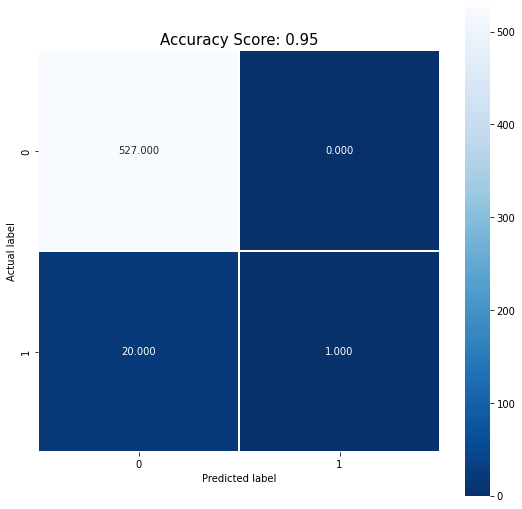

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(avg_acc)
plt.title(all_sample_title, size = 15);